# Задание 2
## Реализовать методы поиска в соответствии с заданием.
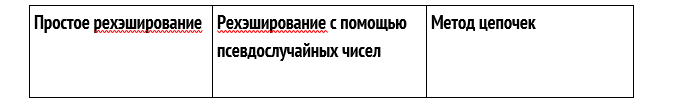

In [3]:
import random
import sys

In [4]:
massiv = ['a','b','c','d','e','e','b']
hashTableN = [None] * len(massiv)
hashTableR = [None] * len(massiv)
hashTableC = [None] * len(massiv)

In [5]:
class mainH():
    def __init__(self, mass, htb):

        self.mass = mass
        self.mass1 = mass
        self.hashtbl = htb
        self.size = len(mass)
        self.check = 0


    def hash(self):
        sum = 0
        for pos in range(len(self.mass1)):
            sum = sum + ord(self.mass1[pos])

        return sum % self.size

    def ReHash(self,pos):
        return (pos + self.check) % self.size

    def random(self):
        sum = 0
        for pos in range(len(self.mass1)):
            sum = sum + ord(self.mass1[pos]) * 7
        return sum % self.size

In [6]:
class proccessing(mainH):
    def Simple(self):

        for j in range(len(self.mass)):
            self.mass1 = self.mass[j]
            if self.hashtbl[mainH.hash(self)] == None:
                self.hashtbl[mainH.hash(self)] = self.mass[j]
            else:
                while self.hashtbl[mainH.ReHash(self,mainH.hash(self))] != None:
                    self.check += 1
                self.hashtbl[mainH.ReHash(self,mainH.hash(self))] = self.mass[j]

        return self.hashtbl

    def Pseudo(self):

        for j in range(len(self.mass)):
            self.mass1 = self.mass[j]
            if self.hashtbl[mainH.random(self)] == None:
                self.hashtbl[mainH.random(self)] = self.mass[j]
            else:
                while self.hashtbl[mainH.ReHash(self,mainH.random(self))] != None:
                    self.check = random.randint(1, self.size)
                self.hashtbl[mainH.ReHash(self,mainH.hash(self))] = self.mass[j]
        return self.hashtbl

    def Chain(self):

        for i in range(len(self.mass)):
            self.mass1 = self.mass[i]
            if self.hashtbl[mainH.hash(self)] == None:
                self.hashtbl[mainH.hash(self)] = self.mass[i]
            elif self.hashtbl[mainH.hash(self)] != None:
                prevValue = self.hashtbl[mainH.hash(self)]
                if type(prevValue) != "list":
                    self.hashtbl[mainH.hash(self)] = []
                    if type(prevValue) is list:
                        for j in range(len(prevValue)):
                            self.hashtbl[mainH.hash(self)].append(prevValue[j])
                    else:
                        self.hashtbl[mainH.hash(self)].append(prevValue)
                        self.hashtbl[mainH.hash(self)].append(self.mass[i])

        return self.hashtbl


In [7]:
if __name__ == "__main__":
    rehash1 = proccessing(massiv,hashTableN)
    print("Простое рехеширование - ",rehash1.Simple())
    rehash2 = proccessing(massiv, hashTableR)
    print("Псевдо рехеширование - ",rehash2.Pseudo())
    rehash3 = proccessing(massiv, hashTableC)
    print("Цепочки - ", rehash3.Chain())

Простое рехеширование -  ['b', 'c', 'd', 'e', 'e', 'b', 'a']
Псевдо рехеширование -  ['c', 'd', 'e', None, None, None, 'b']
Цепочки -  [['b', 'b'], 'c', 'd', ['e', 'e'], None, None, 'a']


In [8]:
def findValue(key, array):
    k = 0
    for idxI, itemI in enumerate(array):
        if (type(itemI) is list):
            for idxJ, itemJ in enumerate(array[idxI]):
                if (itemJ == key):
                    return f'{idxI} - {itemJ} ({idxJ})'
        else:
            if (itemI == key):
                return f'{idxI} - {itemI}'
        k += 1
        if itemI != key and k == int(len(array)-1):
            return "Не найдено"

    return array[mainH.hash(key, len(strArray))]

In [10]:
print(findValue("c",rehash3.Chain()))
print(findValue("q",rehash3.Chain()))

1 - c (0)
Не найдено
